In [1]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import warnings


In [15]:
data_totl = pd.read_csv("C:\\Users\\mgabi\\Desktop\\becode\\becode_projects\\Immo_2nd_milestone\\Data\\cleaned\\No_outliers\\houses_and_apartments_no_outliers.csv")

In [16]:

# Filter the DataFrame for a specific region
df_brussels = data_totl[data_totl['Region'] == 'Brussels']
df_flanders = data_totl[data_totl['Region'] == 'Flanders']
df_Wallonie =data_totl[data_totl['Region'] == 'Wallonie']

Number of observation data before removing the outliers in Brussels is 1891
Number of observation data before removing the outliers in Flanders is 1768
Number of observation data before removing the outliers in Wallonia is 390


In [17]:
###### General info #########

avg_price_Houses = round(data_Houses['Price'].mean(),0)
avg_price_Apartment = round(data_Apartments['Price'].mean(),0)
print('The average prices of houses over belgium before removing the outliers is',avg_price_Houses,'€')
print('The average prices of apartments over belgium before removing the outliers is',avg_price_Apartment, '€')

The average prices of houses over belgium before removing the outliers is 430352.0 €
The average prices of apartments over belgium before removing the outliers is 316827.0 €


##Inter-Quartile Range (IQR) proximity rule.
The data points that fall below Q1 – 1.5 IQR or above the third quartile Q3 + 1.5 IQR are outliers
where Q1 and Q3 are the 25th and 75th percentile of the dataset, respectively. IQR represents the inter-quartile range and is given by Q3 – Q1


# The outlier can be set as a category for rich people.
## This can be done by 
data_A_no_outlier = data_Apartments[data_Apartments['price'] > 500000]
Then the analysis could be done

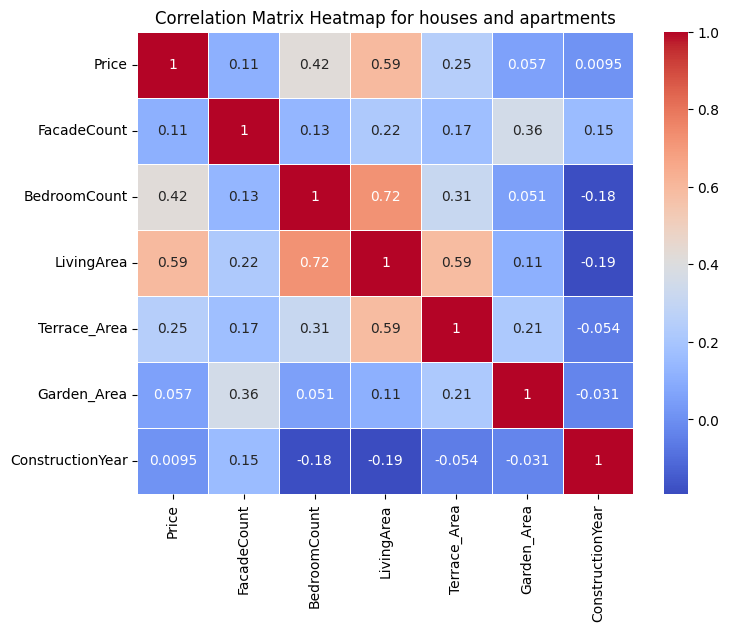

                     Price  FacadeCount  BedroomCount  LivingArea  \
Price             1.000000     0.109635      0.419584    0.592155   
FacadeCount       0.109635     1.000000      0.130862    0.222122   
BedroomCount      0.419584     0.130862      1.000000    0.721605   
LivingArea        0.592155     0.222122      0.721605    1.000000   
Terrace_Area      0.249340     0.170305      0.313243    0.590050   
Garden_Area       0.056802     0.357067      0.051400    0.108213   
ConstructionYear  0.009533     0.154465     -0.184390   -0.191413   

                  Terrace_Area  Garden_Area  ConstructionYear  
Price                 0.249340     0.056802          0.009533  
FacadeCount           0.170305     0.357067          0.154465  
BedroomCount          0.313243     0.051400         -0.184390  
LivingArea            0.590050     0.108213         -0.191413  
Terrace_Area          1.000000     0.213807         -0.054401  
Garden_Area           0.213807     1.000000         -0.030694  

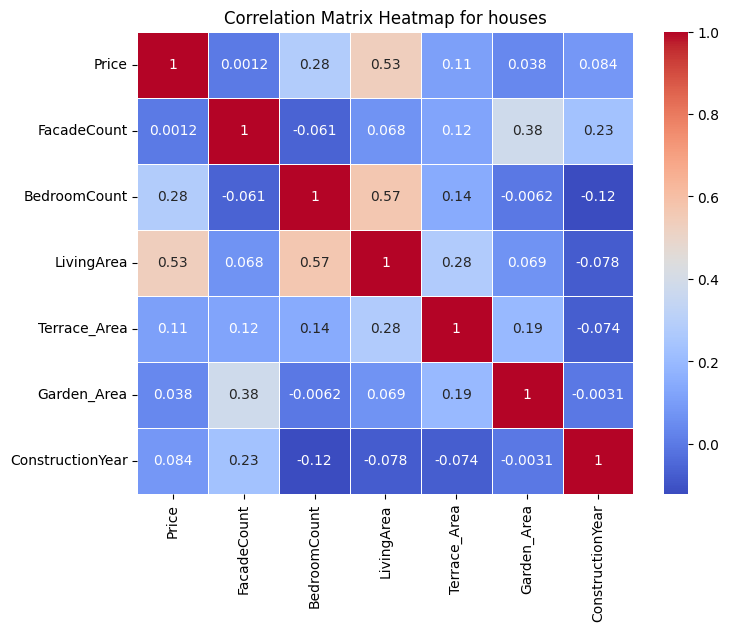

                     Price  FacadeCount  BedroomCount  LivingArea  \
Price             1.000000     0.001222      0.280359    0.533609   
FacadeCount       0.001222     1.000000     -0.061431    0.067619   
BedroomCount      0.280359    -0.061431      1.000000    0.568679   
LivingArea        0.533609     0.067619      0.568679    1.000000   
Terrace_Area      0.107554     0.121897      0.142671    0.277215   
Garden_Area       0.038122     0.378988     -0.006222    0.068652   
ConstructionYear  0.084261     0.231506     -0.120965   -0.078324   

                  Terrace_Area  Garden_Area  ConstructionYear  
Price                 0.107554     0.038122          0.084261  
FacadeCount           0.121897     0.378988          0.231506  
BedroomCount          0.142671    -0.006222         -0.120965  
LivingArea            0.277215     0.068652         -0.078324  
Terrace_Area          1.000000     0.194861         -0.073596  
Garden_Area           0.194861     1.000000         -0.003068  

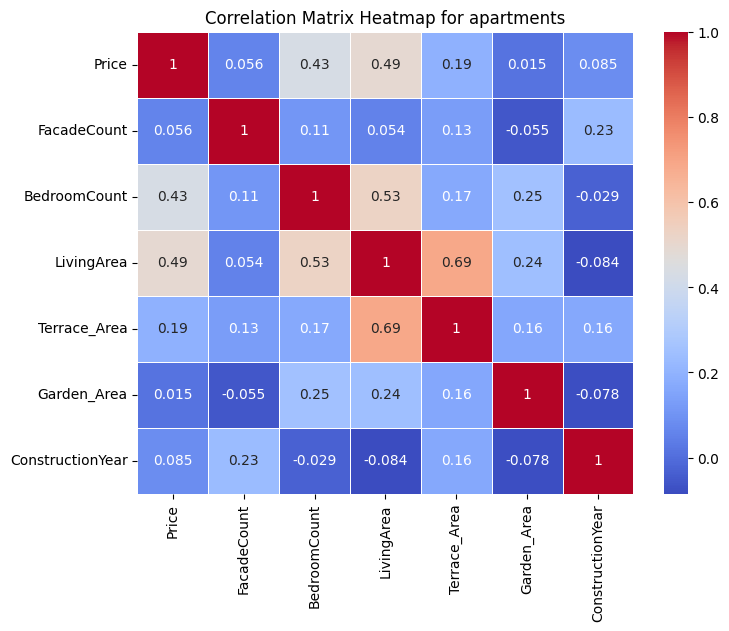

                     Price  FacadeCount  BedroomCount  LivingArea  \
Price             1.000000     0.055669      0.429059    0.494888   
FacadeCount       0.055669     1.000000      0.107759    0.054285   
BedroomCount      0.429059     0.107759      1.000000    0.527153   
LivingArea        0.494888     0.054285      0.527153    1.000000   
Terrace_Area      0.192481     0.127654      0.166953    0.686835   
Garden_Area       0.014914    -0.055064      0.251930    0.243443   
ConstructionYear  0.084612     0.232959     -0.029406   -0.084185   

                  Terrace_Area  Garden_Area  ConstructionYear  
Price                 0.192481     0.014914          0.084612  
FacadeCount           0.127654    -0.055064          0.232959  
BedroomCount          0.166953     0.251930         -0.029406  
LivingArea            0.686835     0.243443         -0.084185  
Terrace_Area          1.000000     0.157256          0.162621  
Garden_Area           0.157256     1.000000         -0.077839  

In [20]:
##################### correlation analysis #########################

def heat_map(data,title):
    selected_parameters = data[['Price', 'FacadeCount', 'BedroomCount', 'LivingArea','Terrace_Area','Garden_Area','ConstructionYear']]
    correlation_matrix = selected_parameters.corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(title)
    plt.show()
    print(correlation_matrix)

###################   All data #################################
heat_map(data=data_totl,title = "Correlation Matrix Heatmap for houses and apartments")
data_Houses = data_totl[data_totl['PropertySubtype']== 'HOUSE']
heat_map(data=data_Houses,title = "Correlation Matrix Heatmap for houses")
data_Apartments = data_totl[data_totl['PropertySubtype']== 'APARTMENT']
heat_map(data=data_Apartments,title = "Correlation Matrix Heatmap for apartments")

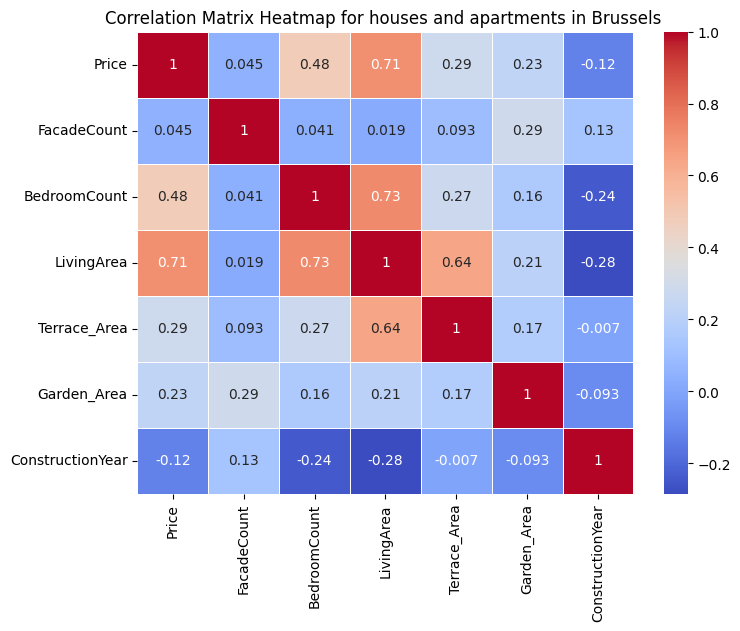

                     Price  FacadeCount  BedroomCount  LivingArea  \
Price             1.000000     0.044836      0.480139    0.710315   
FacadeCount       0.044836     1.000000      0.040743    0.018870   
BedroomCount      0.480139     0.040743      1.000000    0.726687   
LivingArea        0.710315     0.018870      0.726687    1.000000   
Terrace_Area      0.285595     0.092606      0.274544    0.640863   
Garden_Area       0.228571     0.288296      0.158909    0.208160   
ConstructionYear -0.123124     0.131965     -0.242713   -0.283746   

                  Terrace_Area  Garden_Area  ConstructionYear  
Price                 0.285595     0.228571         -0.123124  
FacadeCount           0.092606     0.288296          0.131965  
BedroomCount          0.274544     0.158909         -0.242713  
LivingArea            0.640863     0.208160         -0.283746  
Terrace_Area          1.000000     0.174434         -0.006997  
Garden_Area           0.174434     1.000000         -0.093114  

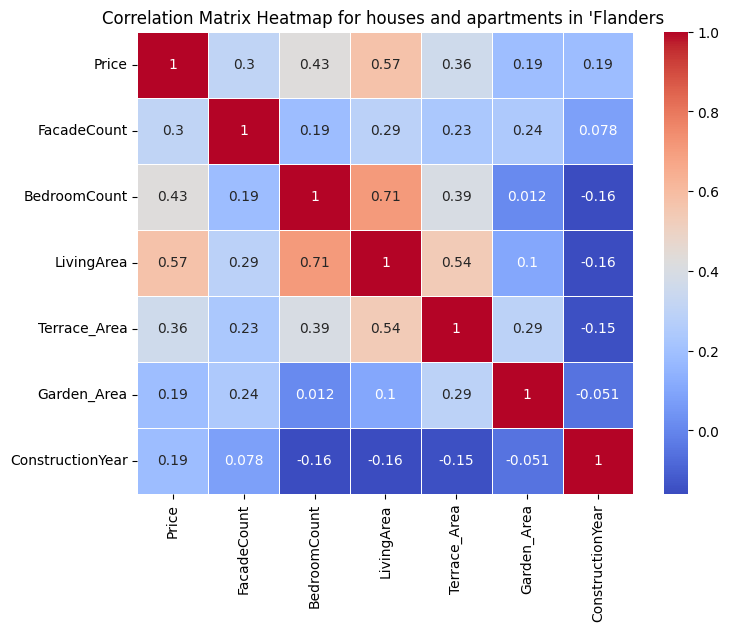

                     Price  FacadeCount  BedroomCount  LivingArea  \
Price             1.000000     0.303940      0.428854    0.574152   
FacadeCount       0.303940     1.000000      0.185507    0.286890   
BedroomCount      0.428854     0.185507      1.000000    0.706544   
LivingArea        0.574152     0.286890      0.706544    1.000000   
Terrace_Area      0.357625     0.234040      0.394621    0.536837   
Garden_Area       0.186394     0.240853      0.012178    0.100037   
ConstructionYear  0.185229     0.078154     -0.157667   -0.158149   

                  Terrace_Area  Garden_Area  ConstructionYear  
Price                 0.357625     0.186394          0.185229  
FacadeCount           0.234040     0.240853          0.078154  
BedroomCount          0.394621     0.012178         -0.157667  
LivingArea            0.536837     0.100037         -0.158149  
Terrace_Area          1.000000     0.290618         -0.145073  
Garden_Area           0.290618     1.000000         -0.051273  

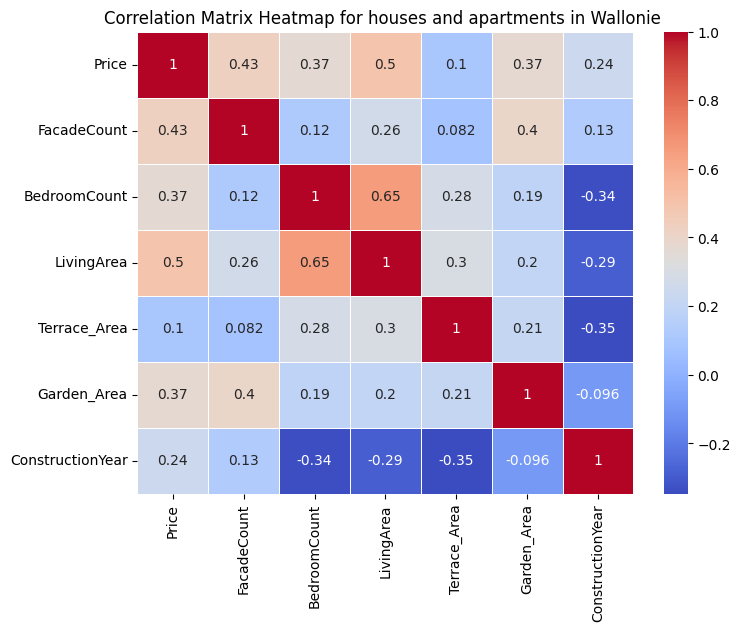

                     Price  FacadeCount  BedroomCount  LivingArea  \
Price             1.000000     0.430617      0.367562    0.498407   
FacadeCount       0.430617     1.000000      0.120079    0.264913   
BedroomCount      0.367562     0.120079      1.000000    0.654020   
LivingArea        0.498407     0.264913      0.654020    1.000000   
Terrace_Area      0.102931     0.082399      0.280295    0.298379   
Garden_Area       0.373251     0.396706      0.189029    0.203484   
ConstructionYear  0.241507     0.130091     -0.338403   -0.291708   

                  Terrace_Area  Garden_Area  ConstructionYear  
Price                 0.102931     0.373251          0.241507  
FacadeCount           0.082399     0.396706          0.130091  
BedroomCount          0.280295     0.189029         -0.338403  
LivingArea            0.298379     0.203484         -0.291708  
Terrace_Area          1.000000     0.211816         -0.346500  
Garden_Area           0.211816     1.000000         -0.095944  

In [21]:
############################ per region ##############################
df_brussels = data_totl[data_totl['Region'] == 'Brussels']
df_flanders = data_totl[data_totl['Region'] == 'Flanders']
df_Wallonie =data_totl[data_totl['Region'] == 'Wallonie']
heat_map(data=df_brussels,title = "Correlation Matrix Heatmap for houses and apartments in Brussels ")
heat_map(data=df_flanders,title = "Correlation Matrix Heatmap for houses and apartments in 'Flanders ")
heat_map(data=df_Wallonie,title = "Correlation Matrix Heatmap for houses and apartments in Wallonie ")

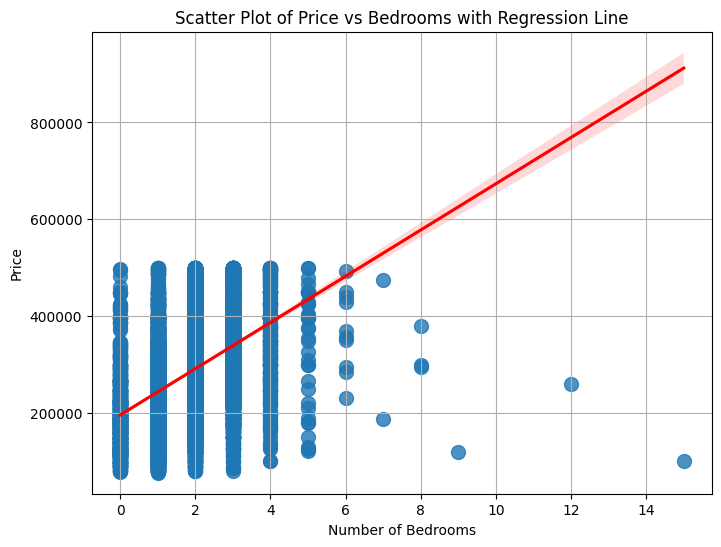

Pearson correlation between price and bedrooms: 0.41395036213129494


In [110]:
####################### verification ##################################
df_cleaned = data_A_no_outlier.dropna(subset=['price', 'nbr_bedrooms'])

# Scatter plot with a regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='nbr_bedrooms', y='price', data=df_cleaned, scatter_kws={'s': 100}, line_kws={"color": "red"})
plt.title('Scatter Plot of Price vs Bedrooms with Regression Line')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Calculate the Pearson correlation between price and bedrooms
correlation_value = df_cleaned['price'].corr(df_cleaned['nbr_bedrooms'])

# Print the Pearson correlation value
print(f"Pearson correlation between price and bedrooms: {correlation_value}")

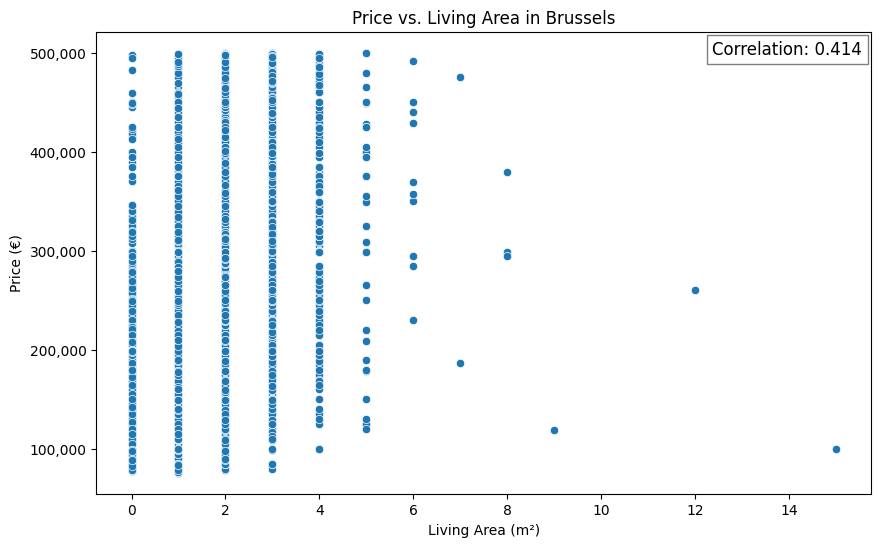

In [118]:
correlation = data_A_no_outlier['nbr_bedrooms'].corr(data_A_no_outlier['price'])
correlation_roun = round(correlation, 3)
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nbr_bedrooms', y='price', data=data_A_no_outlier)
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)# this can be fixed later after removing the non values and the outlaiers
plt.title('Price vs. Living Area in Brussels')
plt.xlabel('Living Area (m²)')
plt.ylabel('Price (€)')
plt.text(0.795, 0.95, f'Correlation: {correlation_roun}', 
         transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5))

plt.show()